In [258]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install openpyxl
!pip install scikit-learn
!pip install seaborn
!pip install tensorflow 
!pip install torch

In [259]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

載入數據集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset
df_train = pd.read_excel('Data/train.xlsx')
df_valid = pd.read_excel('Data/valid.xlsx')
df_test = pd.read_excel('Data/test-reindex-test.xlsx')

# print(df_train.head(1))
print(df_train.columns.tolist())

['編號', '總價元', '鄉鎮市區', '交易標的', '土地位置建物門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元', '備註', '建案名稱', '棟及號', '解約情形']


重新調整train、valid資料集比例(80/20)

In [2]:
df_all = pd.concat([df_train, df_valid], axis=0)
df_all = df_all.sample(frac=1, random_state=42).reset_index(drop=True)

df_valid_ratio = 0.2
df_valid_size = int(len(df_all) * df_valid_ratio)

df_train = df_all[:-df_valid_size]
df_valid = df_all[-df_valid_size:]

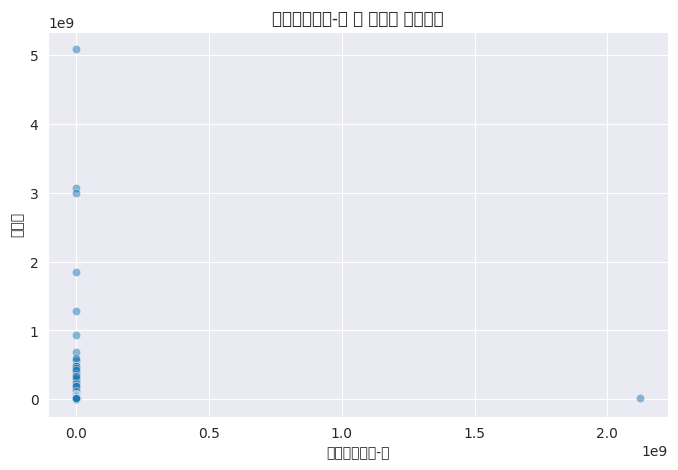

,編號,總價元,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,...,建物現況格局-隔間,有無管理組織,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,建案名稱,棟及號,解約情形
0,RPRVPLMLIIIFFAH58CB,8400000,龜山區,房地(土地+建物)+車位,桃園縣龜山鄉牛角坡段樟腦寮小段69-13號地號等48筆L2-19F,23.83,住,NaN,NaN,1020801,...,有,無,45713,坡道平面,36.39,1000000,NaN,NaN,NaN,NaN
1,RPUNMLPLKIIGFDC18CB,10950000,中山區,房地(土地+建物)+車位,基隆市中山區復興路261號之對面,13.11,商,NaN,NaN,1121210,...,有,無,107071,坡道平面,29.66,1850000,NaN,夢悅城,F棟02號,NaN
2,RPPNMLTJJIIGFEF18CB,21770000,淡水區,房地(土地+建物)+車位,新北市淡水區民權路,18.82,住,NaN,NaN,1121018,...,有,無,144496,坡道平面,37.12,2000000,NaN,青澤,C棟C5號,NaN
3,RPWWMLLKMHLFFCF66CB,10380000,新店區,房地(土地+建物)+車位,新北市新店區安祥路及建業路口微風區B1-5F,46.58,NaN,山坡地保育區,丙種建築用地,1031128,...,有,無,69429,坡道平面,34.82,1350000,NaN,NaN,NaN,NaN
4,RPPNMLTKJIGGFBK38DB,8550000,苗栗市,房地(土地+建物)+車位,苗栗縣苗栗市英才段1042-1地號,42.90,住,NaN,NaN,1101029,...,有,無,59807,一樓平面,0,0,NaN,鑫美麗NO.3,B棟2號,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374220,RPSONLRLNHPFFBH86CB,11330000,中壢區,房地(土地+建物)+車位,桃園市中壢區永泰路151號旁B1-15F,19,住,NaN,NaN,1061230,...,有,無,70636,坡道平面,56.32,2800000,NaN,明日朗朗,NaN,NaN
374221,RPPNMLQKNHHGFIB18CB,19300000,大里區,房地(土地+建物)+車位,臺中市大里區現岱路,27.50,住,NaN,NaN,1110420,...,有,無,114347,坡道平面,51.06,3400000,NaN,昂峰聚羨岱,A棟9號,NaN
374222,RPPNMLNJPHIGFFB77CB,10380000,梧棲區,房地(土地+建物)+車位,臺中市梧棲區中華路,25.95,住,NaN,NaN,1120612,...,有,無,76119,坡道平面,31.40,1200000,NaN,大道100,A棟12號,NaN
374223,RPVOMLNKPHJGFEE88CB,14890000,楠梓區,房地(土地+建物)+車位,高雄市楠梓區加昌路Ｘ瑞屏路,7.06,商,NaN,NaN,1130629,...,有,無,93860,坡道平面,15.81,2080000,NaN,福懋MORE+,A棟7號,NaN


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams['font.family'] = 'Microsoft YaHei'  
rcParams['axes.unicode_minus'] = False  

# 定義移除離群值的函數
def remove_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    # 計算 Z 分數，並篩選絕對值小於等於閾值的數據
    df_clean = df[(np.abs((df[column] - mean) / std) <= threshold)]
    return df_clean

# 定義繪製散佈圖的函數
def scatterplot(feature, df):
    df_copy = df.copy()
    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
    sns.set_style('darkgrid')

    # 將特徵轉換為數值型態
    df_copy[feature] = pd.to_numeric(df_copy[feature], errors='coerce')
    df_copy.dropna(subset=[feature, '總價元'], inplace=True)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_copy[feature], y=df_copy['總價元'], alpha=0.5)

    plt.title(f'{feature} 與 總價元 的散佈圖', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('總價元')

    plt.show()

    return df_copy

feature = '建物現況格局-房'  # 請替換為你的特徵名稱
scatterplot(feature, df_train)


刪除掉raw data中有"main use"的row

In [3]:
df_train = df_train[~df_train['主要用途'].str.contains("main use", na=False)]

刪除不重要的特徵

In [4]:
df_train = df_train.drop(['編號', '解約情形', '棟及號', '交易標的','移轉層次','總樓層數', '非都市土地使用編定' , '有無管理組織' ,'備註', '建案名稱', '建築完成年月', '交易年月日'], axis=1)
df_valid = df_valid.drop(['編號', '解約情形', '棟及號', '交易標的','移轉層次','總樓層數', '非都市土地使用編定' , '有無管理組織' ,'備註', '建案名稱', '建築完成年月', '交易年月日'], axis=1)
df_test = df_test.drop(['編號', '解約情形', '棟及號', '交易標的','移轉層次','總樓層數', '非都市土地使用編定' , '有無管理組織' ,'備註', '建案名稱', '建築完成年月', '交易年月日'], axis=1)
print(df_train.columns.tolist())
print(df_train.dtypes)

['總價元', '鄉鎮市區', '土地位置建物門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '交易筆棟數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元']
總價元            object
鄉鎮市區           object
土地位置建物門牌       object
土地移轉總面積平方公尺    object
都市土地使用分區       object
非都市土地使用分區      object
交易筆棟數          object
建物型態           object
主要用途           object
主要建材           object
建物移轉總面積平方公尺    object
建物現況格局-房       object
建物現況格局-廳       object
建物現況格局-衛       object
建物現況格局-隔間      object
單價元平方公尺        object
車位類別           object
車位移轉總面積平方公尺    object
車位總價元          object
dtype: object


刪除離群值

In [5]:
df_train = df_train[df_train['土地移轉總面積平方公尺'] < 8000]
df_train = df_train[df_train['建物移轉總面積平方公尺'] < 15000] #
df_train = df_train[df_train['車位移轉總面積平方公尺'] < 4000]
df_train = df_train[df_train['車位總價元'] < 14000000]

# 檢查結果
print("訓練集 rows:", len(df_train))
print("驗證集 rows:", len(df_valid))

訓練集 rows: 374108
驗證集 rows: 93556


處理空值

In [6]:
# df_test['移轉層次'] = df_test['移轉層次'].fillna(0)
# df_test['總樓層數'] = df_test['總樓層數'].fillna(0)


# 合併土地使用分區，然後空值填0
df_train['合併後土地使用分區'] = df_train['都市土地使用分區'].combine_first(df_train['非都市土地使用分區']).fillna('其他')
df_valid['合併後土地使用分區'] = df_valid['都市土地使用分區'].combine_first(df_valid['非都市土地使用分區']).fillna('其他')
df_test['合併後土地使用分區'] = df_test['都市土地使用分區'].combine_first(df_test['非都市土地使用分區']).fillna('其他')

# 將主要用途填滿
def fill_main_usage(df):
    conditions = [
        (df['合併後土地使用分區'] == '住'),
        (df['合併後土地使用分區'].isin(['商', '工'])),
        (df['合併後土地使用分區'] == '農'),
        (df['合併後土地使用分區'] == '其他'),
        (df['合併後土地使用分區'] == '工業區'),
        (df['合併後土地使用分區'] == '鄉村區')
    ]
    choices = ['住家用', '工商用','農業用', '工商用', '工業用', '住家用']   
    fill_values = pd.Series(np.select(conditions, choices, default=df['主要用途']), index=df.index)
    df['主要用途'] = df['主要用途'].combine_first(fill_values)
   
    return df

df_train = fill_main_usage(df_train)
df_valid = fill_main_usage(df_valid)
df_test = fill_main_usage(df_test)

df_train = df_train.drop(['都市土地使用分區', '非都市土地使用分區'], axis=1)
df_valid = df_valid.drop(['都市土地使用分區', '非都市土地使用分區'], axis=1)
df_test = df_test.drop(['都市土地使用分區', '非都市土地使用分區'], axis=1)

df_train[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']] = df_train[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']].fillna(df_train[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']].mean())
df_valid[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']] = df_valid[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']].fillna(df_valid[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']].mean())
df_test[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']] = df_test[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']].fillna(df_test[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺']].mean())


df_train['單價元平方公尺'] = df_train['單價元平方公尺'].fillna(df_train['單價元平方公尺'].mean())
df_valid['單價元平方公尺'] = df_valid['單價元平方公尺'].fillna(df_valid['單價元平方公尺'].mean())
df_test['單價元平方公尺'] = df_test['單價元平方公尺'].fillna(df_test['單價元平方公尺'].mean())


# 將主要建材空值填0
df_train = df_train.dropna(subset=['主要建材'])
df_valid = df_valid.dropna(subset=['主要建材'])
df_test['主要建材'] = df_test['主要建材'].fillna("見使用執照")


# 將車位類別空值填0
df_train['車位類別'] = df_train['車位類別'].fillna("無")
df_valid['車位類別'] = df_valid['車位類別'].fillna("無")
df_test['車位類別'] = df_test['車位類別'].fillna("無")


# 將建物現況格局空值填0
for col in ['建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛']:
    median_value = df_train[col].median()
    df_train[col].fillna(0, inplace=True)
    df_valid[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)

針對 縣市進行 label embedding

In [7]:
from sklearn.preprocessing import StandardScaler

city_to_price = {
    '臺北市': 217000,  
    '台北市': 217000,  
    '新北市': 70000,   
    '新竹市': 40000,  
    '新竹縣': 36000,   
    '基隆市': 30000,  
    '桃園市': 30000,   
    '桃園縣': 30000,   
    '臺中市': 32000,   
    '台中市': 32000,   
    '高雄市': 25000,   
    '臺南市': 25000,   
    '台南市': 25000,
    '彰化縣': 20000,   
    '苗栗縣': 22000,   
    '南投縣': 20000,   
    '嘉義市': 22000,  
    '嘉義縣': 20000,   
    '宜蘭縣': 22000,  
    '雲林縣': 20000,  
    '屏東縣': 20000, 
    '花蓮縣': 18000, 
    '臺東縣': 18000,   
    '金門縣': 18000,
    '澎湖縣': 19000,  
}

# 提取 "土地位置建物門牌" 的前面三個字作為 "縣市"
df_train['縣市'] = df_train['土地位置建物門牌'].str[:3]
df_valid['縣市'] = df_valid['土地位置建物門牌'].str[:3]
df_test['縣市'] = df_test['土地位置建物門牌'].str[:3]

# 只保留那些 "縣市" 是 city_to_price 字典中的資料，其他捨棄
df_train = df_train[df_train['縣市'].isin(city_to_price.keys())]
df_valid = df_valid[df_valid['縣市'].isin(city_to_price.keys())]
df_test = df_test[df_test['縣市'].isin(city_to_price.keys())]

# 將 "縣市" 欄位替換成對應的平均房價
df_train['平均房價'] = df_train['縣市'].replace(city_to_price)
df_valid['平均房價'] = df_valid['縣市'].replace(city_to_price)
df_test['平均房價'] = df_test['縣市'].replace(city_to_price)


scaler = StandardScaler()

features_train = df_train[['平均房價']]
scaled_features_train = scaler.fit_transform(features_train)
df_train['平均房價'] = scaled_features_train[:, 0]

features_valid = df_valid[['平均房價']]
scaled_features_valid = scaler.transform(features_valid)
df_valid['平均房價'] = scaled_features_valid[:, 0]

features_test = df_test[['平均房價']]
scaled_features_test = scaler.transform(features_test)
df_test['平均房價'] = scaled_features_test[:, 0]


# 移除原本的 "土地位置建物門牌" 和 "縣市" 欄位
df_train = df_train.drop(['土地位置建物門牌', '縣市'], axis=1)
df_valid = df_valid.drop(['土地位置建物門牌', '縣市'], axis=1)
df_test = df_test.drop(['土地位置建物門牌', '縣市'], axis=1)


print(df_train.columns[:])


Index(['總價元', '鄉鎮市區', '土地移轉總面積平方公尺', '交易筆棟數', '建物型態', '主要用途', '主要建材',
       '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間',
       '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元', '合併後土地使用分區', '平均房價'],
      dtype='object')


針對 鄉鎮市區 進行 target encoding

In [8]:
df_train = df_train.drop(['鄉鎮市區'], axis=1)
df_valid = df_valid.drop(['鄉鎮市區'], axis=1)
df_test = df_test.drop(['鄉鎮市區'], axis=1)

In [269]:
from sklearn.model_selection import KFold


# 合併訓練和驗證集以便於Target Encoding
df_combined = pd.concat([df_train, df_valid], ignore_index=True)
# 初始化一個新的欄位來存儲編碼後的「鄉鎮市區」
df_combined['鄉鎮市區_編碼'] = np.nan

# 進行K折交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(df_combined):
    df_train_fold = df_combined.iloc[train_index]
    df_val_fold = df_combined.iloc[val_index]

    # 計算訓練折中每個「鄉鎮市區」的平均房價
    target_mean = df_train_fold.groupby('鄉鎮市區')['總價元'].mean()
    df_combined.loc[val_index, '鄉鎮市區_編碼'] = df_val_fold['鄉鎮市區'].map(target_mean)

overall_mean = df_combined['總價元'].mean()
df_combined['鄉鎮市區_編碼'] = df_combined['鄉鎮市區_編碼'].fillna(overall_mean)

scaler = StandardScaler()
df_combined['鄉鎮市區_編碼'] = scaler.fit_transform(df_combined[['鄉鎮市區_編碼']])

# 正確拆分處理後的訓練集和驗證集，保持原變數名稱
df_train = df_combined.iloc[:len(df_train)].reset_index(drop=True)
df_valid = df_combined.iloc[len(df_train):].reset_index(drop=True)

target_mean_full = df_train.groupby('鄉鎮市區')['總價元'].mean()
df_test['鄉鎮市區_編碼'] = df_test['鄉鎮市區'].map(target_mean_full)
df_test['鄉鎮市區_編碼'] = df_test['鄉鎮市區_編碼'].fillna(overall_mean)
df_test['鄉鎮市區_編碼'] = scaler.transform(df_test[['鄉鎮市區_編碼']])


df_train = df_train.drop(['鄉鎮市區'], axis=1)
df_valid = df_valid.drop(['鄉鎮市區'], axis=1)
df_test = df_test.drop(['鄉鎮市區'], axis=1)


print("更新後的訓練集 columns:", df_train.columns)
print("更新後的驗證集 columns:", df_valid.columns)
print("更新後的測試集 columns:", df_test.columns)


KeyError: '鄉鎮市區'

In [258]:
df_train.isna().sum()

總價元            0
土地移轉總面積平方公尺    0
交易筆棟數          0
建物型態           0
主要用途           0
主要建材           0
建物移轉總面積平方公尺    0
建物現況格局-房       0
建物現況格局-廳       0
建物現況格局-衛       0
建物現況格局-隔間      0
單價元平方公尺        0
車位類別           0
車位移轉總面積平方公尺    0
車位總價元          0
合併後土地使用分區      0
平均房價           0
dtype: int64

針對 移轉樓層和總樓層 進行 label embedding、'土地移轉總面積平方公尺', '建物移轉總面積平方公尺'進行PCA降維合併

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=1)

area_features_train = df_train[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺','車位移轉總面積平方公尺']]
pca_train_features = pca.fit_transform(area_features_train)
df_train['PCA_Area'] = pca_train_features

area_features_valid = df_valid[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺','車位移轉總面積平方公尺']]
pca_valid_features = pca.transform(area_features_valid)
df_valid['PCA_Area'] = pca_valid_features

area_features_test = df_test[['土地移轉總面積平方公尺', '建物移轉總面積平方公尺','車位移轉總面積平方公尺']]
pca_test_features = pca.transform(area_features_test)
df_test['PCA_Area'] = pca_test_features


# df_train = df_train.drop(['建物移轉總面積平方公尺'], axis=1)
# df_valid = df_valid.drop(['建物移轉總面積平方公尺'], axis=1)
# df_test = df_test.drop(['建物移轉總面積平方公尺'], axis=1)

print(df_train.count())

總價元            374056
土地移轉總面積平方公尺    374056
交易筆棟數          374056
建物型態           374056
主要用途           374056
主要建材           374056
建物移轉總面積平方公尺    374056
建物現況格局-房       374056
建物現況格局-廳       374056
建物現況格局-衛       374056
建物現況格局-隔間      374056
單價元平方公尺        374056
車位類別           374056
車位移轉總面積平方公尺    374056
車位總價元          374056
合併後土地使用分區      374056
平均房價           374056
PCA_Area       374056
dtype: int64


生成一個新特徵 土地移轉總面積平方公尺*單價元平方公尺 和 建物平方公尺乘上單價元

In [10]:
# df_train['平方公尺乘上單價元'] = df_train['土地移轉總面積平方公尺'] * df_train['單價元平方公尺']
# df_valid['平方公尺乘上單價元'] = df_valid['土地移轉總面積平方公尺'] * df_valid['單價元平方公尺']
# df_test['平方公尺乘上單價元'] = df_test['土地移轉總面積平方公尺'] * df_test['單價元平方公尺']

df_train['建物平方公尺乘上單價元'] = df_train['建物移轉總面積平方公尺'] * df_train['單價元平方公尺']
df_valid['建物平方公尺乘上單價元'] = df_valid['建物移轉總面積平方公尺'] * df_valid['單價元平方公尺']
df_test['建物平方公尺乘上單價元'] = df_test['建物移轉總面積平方公尺'] * df_test['單價元平方公尺']

# df_train = df_train.drop(['土地移轉總面積平方公尺', '單價元平方公尺'], axis=1)
# df_valid = df_valid.drop(['土地移轉總面積平方公尺', '單價元平方公尺'], axis=1)
# df_test = df_test.drop(['土地移轉總面積平方公尺', '單價元平方公尺'], axis=1)

# scaler = StandardScaler()

# df_train['平方公尺乘上單價元_標準化'] = scaler.fit_transform(df_train[['平方公尺乘上單價元']])
# df_valid['平方公尺乘上單價元_標準化'] = scaler.transform(df_valid[['平方公尺乘上單價元']])
# df_test['平方公尺乘上單價元_標準化'] = scaler.transform(df_test[['平方公尺乘上單價元']])

# df_train = df_train.drop(['平方公尺乘上單價元'], axis=1)
# df_valid = df_valid.drop(['平方公尺乘上單價元'], axis=1)
# df_test = df_test.drop(['平方公尺乘上單價元'], axis=1)

In [213]:
print(df_train.count())

總價元            374056
土地移轉總面積平方公尺    374056
交易筆棟數          374056
建物型態           374056
主要用途           374056
主要建材           374056
建物移轉總面積平方公尺    374056
建物現況格局-房       374056
建物現況格局-廳       374056
建物現況格局-衛       374056
建物現況格局-隔間      374056
單價元平方公尺        374056
車位類別           374056
車位移轉總面積平方公尺    374056
車位總價元          374056
合併後土地使用分區      374056
平均房價           374056
PCA_Area       374056
建物平方公尺乘上單價元    374056
dtype: int64


In [12]:
unique_values = df_train['主要用途'].unique()
unique_values2 = df_valid['主要用途'].unique()

print(unique_values)
print(unique_values2)

['住家用' '見使用執照' '住商用' '商業用' '見其他登記事項' '農業用' '工商用' '工業用' '見其它登記事項' '停車空間'
 '住工用' '國民住宅']
['住家用' '見其他登記事項' '商業用' '停車空間' '住商用' '見使用執照' '工商用' '工業用' '見其它登記事項' '農業用'
 '住工用']


針對 主要用途 進行 label embedding

In [11]:
use_to_price = {
    '住家用': 60000,     # 住家用房屋的平均房價
    '商業用': 90000,     # 商業用房屋的平均房價
    '住商用': 75000,     # 住商混合用途的平均房價
    '工商用': 70000,     # 工商用房屋的平均房價
    '工業用': 50000,     # 工業用房屋的平均房價
    '住工用': 55000,     # 住工混合用途的平均房價
    '國民住宅': 35000,   # 國民住宅的平均房價
    '停車空間': 20000,   # 停車空間的平均價格
    '農業用': 15000,     # 農業用地的平均價格
    '見使用執照': 60000,  # 需參考使用執照的房價
    '見其他登記事項': 60000,  # 需參考其他登記事項的房價
    '見其它登記事項': 60000,  # 同上
}

# 1. 將訓練集中的「主要用途」替換為對應的價格
df_train['主要用途'] = df_train['主要用途'].replace(use_to_price)
df_train['主要用途'] = df_train['主要用途'].fillna(np.mean(list(use_to_price.values())))

# 將「主要用途」進行標準化
scaler = StandardScaler()
df_train[['主要用途']] = scaler.fit_transform(df_train[['主要用途']])


# 2. 將驗證集中的「主要用途」替換為對應的價格
df_valid['主要用途'] = df_valid['主要用途'].replace(use_to_price)
df_valid['主要用途'] = df_valid['主要用途'].fillna(np.mean(list(use_to_price.values())))

# 將「主要用途」進行標準化
df_valid[['主要用途']] = scaler.transform(df_valid[['主要用途']])


# 3. 將測試集中的「主要用途」替換為對應的價格
df_test['主要用途'] = df_test['主要用途'].replace(use_to_price)
df_test['主要用途'] = df_test['主要用途'].fillna(np.mean(list(use_to_price.values())))

# 將「主要用途」進行標準化
df_test[['主要用途']] = scaler.transform(df_test[['主要用途']])


# 檢查結果
print("訓練集 shape:", df_train.shape)
print("驗證集 shape:", df_valid.shape)
print("測試集 shape:", df_test.shape)

訓練集 shape: (374056, 19)
驗證集 shape: (93538, 19)
測試集 shape: (11995, 18)


In [158]:
unique_values = df_train['主要建材'].unique()
unique_values2 = df_valid['主要建材'].unique()

print(unique_values)
print(unique_values2)

['鋼筋混凝土造' '鋼骨混凝土造' '鋼骨鋼筋混凝土造' '見其他登記事項' '見使用執照' '見其它登記事項' '混凝土造' '鋼造'
 '鋼筋混凝土加強磚造' '鋼筋混凝土構造' '石造' '預力混凝土造' '磚造']
['鋼筋混凝土造' '鋼筋混凝土加強磚造' '見其他登記事項' '鋼骨鋼筋混凝土造' '鋼骨混凝土造' '見使用執照' '混凝土造' '鋼造'
 '鋼筋混凝土構造' '木造' '見其它登記事項' '預力混凝土造' '石造']


針對 主要建材 進行 label embedding

In [12]:
material_to_price = {
    '鋼筋混凝土造': 50.0,
    '鋼筋混凝土構造': 50.0,
    '鋼骨混凝土造': 55.0,
    '鋼骨鋼筋混凝土造': 60.0,
    '鋼筋混凝土加強磚造': 45.0,
    '混凝土造': 40.0,
    '鋼造': 35.0,
    '磚造': 30.0,
    '預力混凝土造': 42.0,
    '石造': 28.0,
    '木造': 25.0,
    '見使用執照': 40.0,  
    '見其他登記事項': 40.0,
    '見其它登記事項': 40.0,  
}

# 1. 替換訓練集中的「主要建材」為對應的價格
df_train['主要建材'] = df_train['主要建材'].replace(material_to_price)
df_train['主要建材'] = df_train['主要建材'].fillna(np.mean(list(material_to_price.values())))

# 將「主要建材」進行標準化
scaler = StandardScaler()
df_train[['主要建材']] = scaler.fit_transform(df_train[['主要建材']])

# 2. 替換驗證集中的「主要建材」為對應的價格
df_valid['主要建材'] = df_valid['主要建材'].replace(material_to_price)
df_valid['主要建材'] = df_valid['主要建材'].fillna(np.mean(list(material_to_price.values())))

# 將「主要建材」進行標準化
df_valid[['主要建材']] = scaler.transform(df_valid[['主要建材']])


# 3. 替換測試集中的「主要建材」為對應的價格
df_test['主要建材'] = df_test['主要建材'].replace(material_to_price)
df_test['主要建材'] = df_test['主要建材'].fillna(np.mean(list(material_to_price.values())))

# 將「主要建材」進行標準化
df_test[['主要建材']] = scaler.transform(df_test[['主要建材']])



In [15]:
unique_values = df_train['建物型態'].unique()
unique_values2 = df_valid['建物型態'].unique()

print(unique_values)
print(unique_values2)

['住宅大樓(11層含以上有電梯)' '華廈(10層含以下有電梯)' '透天厝' '店面(店鋪)' '其他' '辦公商業大樓'
 '套房(1房1廳1衛)' '廠辦' '工廠' '公寓(5樓含以下無電梯)' '倉庫']
['住宅大樓(11層含以上有電梯)' '華廈(10層含以下有電梯)' '透天厝' '其他' '店面(店鋪)' '辦公商業大樓' '廠辦'
 '套房(1房1廳1衛)' '工廠' '公寓(5樓含以下無電梯)']


針對 建物型態 進行 label embedding

In [13]:
type_to_price = {
    '住宅大樓(11層含以上有電梯)': 50.0,
    '華廈(10層含以下有電梯)': 45.0,
    '店面(店鋪)': 100.0,
    '辦公商業大樓': 80.0,
    '公寓(5樓含以下無電梯)': 35.0,
    '透天厝': 30.0,
    '廠辦': 40.0,
    '工廠': 35.0,
    '套房(1房1廳1衛)': 40.0,
    '倉庫': 30.0,
    '農舍': 20.0,
    '其他': 40.0,
}

df_train['建物型態'] = df_train['建物型態'].replace(type_to_price)
df_train['建物型態'] = df_train['建物型態'].fillna(np.mean(list(type_to_price.values())))

# 將「建物型態」進行標準化
scaler = StandardScaler()
df_train[['建物型態']] = scaler.fit_transform(df_train[['建物型態']])

# 2. 替換驗證集中的「建物型態」為對應的價格
df_valid['建物型態'] = df_valid['建物型態'].replace(type_to_price)
df_valid['建物型態'] = df_valid['建物型態'].fillna(np.mean(list(type_to_price.values())))

# 使用與訓練集相同的 scaler 進行標準化
df_valid[['建物型態']] = scaler.transform(df_valid[['建物型態']])


# 3. 替換測試集中的「建物型態」為對應的價格
df_test['建物型態'] = df_test['建物型態'].replace(type_to_price)
df_test['建物型態'] = df_test['建物型態'].fillna(np.mean(list(type_to_price.values())))

# 使用與訓練集相同的 scaler 進行標準化
df_test[['建物型態']] = scaler.transform(df_test[['建物型態']])


# 檢查結果
print("訓練集 shape:", df_train.shape)
print("驗證集 shape:", df_valid.shape)
print("測試集 shape:", df_test.shape)


訓練集 shape: (374056, 19)
驗證集 shape: (93538, 19)
測試集 shape: (11995, 18)


In [192]:
unique_values = df_train['車位類別'].unique()
unique_values2 = df_valid['車位類別'].unique()

print(unique_values)
print(unique_values2)

['坡道平面' '一樓平面' '無' '升降平面' '其他' '坡道機械' '塔式車位' '升降機械']
['坡道平面' '無' '坡道機械' '一樓平面' '升降機械' '塔式車位' '其他' '升降平面']


針對 車位類別 進行 label embedding、再對車位屬性進行PCA降維

In [14]:
parking_type_to_price = {
    '坡道平面': 150.0,
    '塔式車位': 80.0,
    '坡道機械': 100.0,
    '升降機械': 70.0,
    '升降平面': 90.0,
    '一樓平面': 200.0,
    '其他': 100.0,
    '無': 0.0,
}

# 定義處理函數
def process_parking_features(df):
    # 替換車位類別為對應的價格
    average_price = np.mean(list(parking_type_to_price.values()))
    df['車位類別'] = df['車位類別'].replace(parking_type_to_price)
    df['車位類別'] = df['車位類別'].fillna(average_price)

    # 處理缺失值
    df['車位移轉總面積平方公尺'] = df['車位移轉總面積平方公尺'].fillna(df['車位移轉總面積平方公尺'].median())
    df['車位總價元'] = df['車位總價元'].fillna(df['車位總價元'].median())

    # 計算車位單價（每平方公尺價格）
    df['車位單價元平方公尺'] = df['車位總價元'] / df['車位移轉總面積平方公尺']
    df['車位單價元平方公尺'] = df['車位單價元平方公尺'].replace([np.inf, -np.inf], np.nan).fillna(df['車位單價元平方公尺'].median())

    # 選擇需要進行 PCA 的特徵
    features = df[['車位類別', '車位移轉總面積平方公尺', '車位單價元平方公尺']]

    # 標準化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled

parking_features_train = process_parking_features(df_train)
parking_features_valid = process_parking_features(df_valid)
parking_features_test = process_parking_features(df_test)

pca = PCA(n_components=1)
parking_pca_train = pca.fit_transform(parking_features_train)
parking_pca_valid = pca.transform(parking_features_valid)
parking_pca_test = pca.transform(parking_features_test)

# 添加 PCA 特徵到原始數據集
df_train['Parking_PCA'] = parking_pca_train
df_valid['Parking_PCA'] = parking_pca_valid
df_test['Parking_PCA'] = parking_pca_test

# # 刪除原始的車位特徵
# df_train.drop(['車位類別', '車位移轉總面積平方公尺', '車位總價元'], axis=1, inplace=True)
# df_valid.drop(['車位類別', '車位移轉總面積平方公尺', '車位總價元'], axis=1, inplace=True)
# df_test.drop(['車位類別', '車位移轉總面積平方公尺', '車位總價元'], axis=1, inplace=True)

# 檢查結果
print("訓練集 columns:", df_train.columns)
print("驗證集 columns:", df_valid.columns)
print("測試集 columns:", df_test.columns)

訓練集 columns: Index(['總價元', '土地移轉總面積平方公尺', '交易筆棟數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '單價元平方公尺', '車位類別',
       '車位移轉總面積平方公尺', '車位總價元', '合併後土地使用分區', '平均房價', 'PCA_Area', '建物平方公尺乘上單價元',
       '車位單價元平方公尺', 'Parking_PCA'],
      dtype='object')
驗證集 columns: Index(['總價元', '土地移轉總面積平方公尺', '交易筆棟數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '單價元平方公尺', '車位類別',
       '車位移轉總面積平方公尺', '車位總價元', '合併後土地使用分區', '平均房價', 'PCA_Area', '建物平方公尺乘上單價元',
       '車位單價元平方公尺', 'Parking_PCA'],
      dtype='object')
測試集 columns: Index(['土地移轉總面積平方公尺', '交易筆棟數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '單價元平方公尺', '車位類別',
       '車位移轉總面積平方公尺', '車位總價元', '合併後土地使用分區', '平均房價', 'PCA_Area', '建物平方公尺乘上單價元',
       '車位單價元平方公尺', 'Parking_PCA'],
      dtype='object')


In [15]:
df_train['車位'] = df_train['交易筆棟數'].str.extract(r'車位(\d+)').astype(float)
df_valid['車位'] = df_valid['交易筆棟數'].str.extract(r'車位(\d+)').astype(float)
df_test['車位'] = df_test['交易筆棟數'].str.extract(r'車位(\d+)').astype(float)


def calculate_total_prices(df):
    df['車位'] = df['交易筆棟數'].str.extract(r'車位(\d+)').astype(float)
    df['車位總價'] = df['車位'] * df['車位總價元']

    return df

# 對訓練、驗證和測試集進行處理
df_train = calculate_total_prices(df_train)
df_valid = calculate_total_prices(df_valid)
df_test = calculate_total_prices(df_test)


df_train = df_train.drop(['交易筆棟數'], axis=1)
df_valid = df_valid.drop(['交易筆棟數'], axis=1)
df_test = df_test.drop(['交易筆棟數'], axis=1)

df_train = df_train.drop(['車位'], axis=1)
df_valid = df_valid.drop(['車位'], axis=1)
df_test = df_test.drop(['車位'], axis=1)

In [16]:
df_train['合併後土地使用分區'].unique()

array(['住', '商', '山坡地保育區', '特定農業區', '其他', '鄉村區', '一般農業區', '工', '農', '工業區',
       '特定專用區', '風景區'], dtype=object)

針對 都市土地使用分區 進行 label embedding

In [16]:
zone_to_price = {
    '住': 50.0,        
    '商': 80.0,        
    '工': 30.0,        
    '農': 15.0,        
    '其他': 45.0,      
    '山坡地保育區': 20.0,  
    '特定農業區': 15.0,    
    '鄉村區': 25.0,      
    '一般農業區': 15.0,  
    '工業區': 30.0,     
    '特定專用區': 40.0,  
    '風景區': 60.0      
}

df_train['合併後土地使用分區'] = df_train['合併後土地使用分區'].replace(zone_to_price)
df_train['合併後土地使用分區'] = df_train['合併後土地使用分區'].fillna(np.mean(list(zone_to_price.values())))

scaler = StandardScaler()
df_train[['合併後土地使用分區']] = scaler.fit_transform(df_train[['合併後土地使用分區']])

df_valid['合併後土地使用分區'] = df_valid['合併後土地使用分區'].replace(zone_to_price)
df_valid['合併後土地使用分區'] = df_valid['合併後土地使用分區'].fillna(np.mean(list(zone_to_price.values())))
df_valid[['合併後土地使用分區']] = scaler.transform(df_valid[['合併後土地使用分區']])

df_test['合併後土地使用分區'] = df_test['合併後土地使用分區'].replace(zone_to_price)
df_test['合併後土地使用分區'] = df_test['合併後土地使用分區'].fillna(np.mean(list(zone_to_price.values())))
df_test[['合併後土地使用分區']] = scaler.transform(df_test[['合併後土地使用分區']])

# 檢查結果
print("訓練集 shape:", df_train.shape)
print("驗證集 shape:", df_valid.shape)
print("測試集 shape:", df_test.shape)


訓練集 shape: (374056, 21)
驗證集 shape: (93538, 21)
測試集 shape: (11995, 20)


對 '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛' 進行加總

In [17]:
# 1. 將 '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛' 轉換為數字類型
for col in ['建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_valid[col] = pd.to_numeric(df_valid[col], errors='coerce')
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
    

# 2. 特徵工程
# 創建新特徵
df_train['總間數'] = df_train['建物現況格局-房'] + df_train['建物現況格局-廳'] + df_train['建物現況格局-衛']
df_valid['總間數'] = df_valid['建物現況格局-房'] + df_valid['建物現況格局-廳'] + df_valid['建物現況格局-衛']
df_test['總間數'] = df_test['建物現況格局-房'] + df_test['建物現況格局-廳'] + df_test['建物現況格局-衛']

# df_train['房廳比'] = df_train['建物現況格局-房'] / (df_train['建物現況格局-廳'] + 1)
# df_valid['房廳比'] = df_valid['建物現況格局-房'] / (df_valid['建物現況格局-廳'] + 1)
# df_test['房廳比'] = df_test['建物現況格局-房'] / (df_test['建物現況格局-廳'] + 1)

# df_train['衛房比'] = df_train['建物現況格局-衛'] / (df_train['建物現況格局-房'] + 1)
# df_valid['衛房比'] = df_valid['建物現況格局-衛'] / (df_valid['建物現況格局-房'] + 1)
# df_test['衛房比'] = df_test['建物現況格局-衛'] / (df_test['建物現況格局-房'] + 1)

df_train = df_train.drop(['建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛'], axis=1)
df_valid = df_valid.drop(['建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛'], axis=1)
df_test = df_test.drop(['建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛'], axis=1)

numeric_features = ['總間數']

scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
df_valid[numeric_features] = scaler.transform(df_valid[numeric_features])
df_test[numeric_features] = scaler.transform(df_test[numeric_features])


print("訓練集 columns:", df_train.columns)


訓練集 columns: Index(['總價元', '土地移轉總面積平方公尺', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺',
       '建物現況格局-隔間', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元', '合併後土地使用分區',
       '平均房價', 'PCA_Area', '建物平方公尺乘上單價元', '車位單價元平方公尺', 'Parking_PCA', '車位總價',
       '總間數'],
      dtype='object')


針對 建物現況格局-隔間 進行 target encoding

In [18]:
from sklearn.model_selection import KFold

df_combined = pd.concat([df_train, df_valid], ignore_index=True)
df_combined['隔間_編碼'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(df_combined):
    df_train_fold = df_combined.iloc[train_index]
    df_val_fold = df_combined.iloc[val_index]
    target_mean = df_train_fold.groupby('建物現況格局-隔間')['總價元'].mean()
    df_combined.loc[val_index, '隔間_編碼'] = df_val_fold['建物現況格局-隔間'].map(target_mean)

overall_mean = df_combined['總價元'].mean()
df_combined['隔間_編碼'] = df_combined['隔間_編碼'].fillna(overall_mean)

scaler = StandardScaler()
df_combined['隔間_編碼'] = scaler.fit_transform(df_combined[['隔間_編碼']])

df_train = df_combined.iloc[:len(df_train)].reset_index(drop=True)
df_valid = df_combined.iloc[len(df_train):].reset_index(drop=True)


target_mean_full = df_train.groupby('建物現況格局-隔間')['總價元'].mean()
df_test['隔間_編碼'] = df_test['建物現況格局-隔間'].map(target_mean_full)
df_test['隔間_編碼'] = df_test['隔間_編碼'].fillna(overall_mean)
df_test['隔間_編碼'] = scaler.transform(df_test[['隔間_編碼']])


df_train = df_train.drop(['建物現況格局-隔間'], axis=1)
df_valid = df_valid.drop(['建物現況格局-隔間'], axis=1)
df_test = df_test.drop(['建物現況格局-隔間'], axis=1)

In [19]:
print(df_train.iloc[0])
print("-"*50)
print(df_valid.iloc[0])
print("-"*50)   
print(df_test.iloc[0])

總價元                 8400000
土地移轉總面積平方公尺           23.83
建物型態               0.162954
主要用途              -0.219939
主要建材               -0.02125
建物移轉總面積平方公尺          198.27
單價元平方公尺             45713.0
車位類別                  150.0
車位移轉總面積平方公尺           36.39
車位總價元               1000000
合併後土地使用分區         -0.247761
平均房價              -0.400085
PCA_Area          50.466503
建物平方公尺乘上單價元      9063516.51
車位單價元平方公尺      27480.076944
Parking_PCA        0.872816
車位總價              1000000.0
總間數               -0.001694
隔間_編碼             -0.190911
Name: 0, dtype: object
--------------------------------------------------
總價元                 9200000
土地移轉總面積平方公尺           25.11
建物型態               0.162954
主要用途              -0.219939
主要建材               -0.02125
建物移轉總面積平方公尺          168.41
單價元平方公尺             58480.0
車位類別                  150.0
車位移轉總面積平方公尺           33.32
車位總價元               1300000
合併後土地使用分區         -0.247761
平均房價              -0.400085
PCA_Area          21.341783
建物平方公尺乘上單價元       9848616.8
車位

In [25]:
import xgboost as xgb


X_train = df_train.drop(columns=['總價元'])  # 特徵欄位
y_train = df_train['總價元']                # 目標變數

X_valid = df_valid.drop(columns=['總價元'])  # 驗證特徵
y_valid = df_valid['總價元']                # 驗證目標變數


dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(df_test)

params = {
    'objective': 'reg:absoluteerror',  # 使用 MAE 進行回歸
    'learning_rate': 0.1,
    'max_depth': 10,
    'eval_metric': 'mae',  
    'lambda': 1,   # L2 正則化
    'alpha': 1     # L1 正則化
}

evallist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=2000, evals=evallist)
predictions = model.predict(dtest)

result_df = pd.DataFrame({
    '編號': df_test.index + 1,  
    '總價元': predictions
})

result_df.to_csv('house_price_predictions.csv', index=False, encoding='utf-8-sig')
print("訓練完成")



[0]	train-mae:5838150.52411	eval-mae:6038667.70425
[1]	train-mae:5401077.97125	eval-mae:5602914.79343
[2]	train-mae:5028024.82450	eval-mae:5238860.82774
[3]	train-mae:4659432.52488	eval-mae:4871605.60421
[4]	train-mae:4310576.23189	eval-mae:4523973.88020
[5]	train-mae:4024643.06731	eval-mae:4251147.78743
[6]	train-mae:3730258.04771	eval-mae:3956595.19174
[7]	train-mae:3455808.94505	eval-mae:3682429.35119
[8]	train-mae:3230704.90010	eval-mae:3458265.67029
[9]	train-mae:3001175.36144	eval-mae:3229246.70372
[10]	train-mae:2781546.19149	eval-mae:3010337.07998
[11]	train-mae:2580486.76876	eval-mae:2810095.09738
[12]	train-mae:2384917.69187	eval-mae:2615693.09907
[13]	train-mae:2212061.14882	eval-mae:2442527.41878
[14]	train-mae:2074421.29684	eval-mae:2325632.50376
[15]	train-mae:1926016.76569	eval-mae:2177339.84267
[16]	train-mae:1786615.01720	eval-mae:2037680.10074
[17]	train-mae:1683010.06798	eval-mae:1946113.47352
[18]	train-mae:1574912.12925	eval-mae:1837965.29111
[19]	train-mae:1462774

In [26]:
import lightgbm as lgb

df_train['總價元'] = pd.to_numeric(df_train['總價元'], errors='coerce')
df_valid['總價元'] = pd.to_numeric(df_valid['總價元'], errors='coerce')

# Step 1: 準備訓練資料和驗證資料
X_train = df_train.drop(columns=['總價元'])  # 特徵欄位
y_train = df_train['總價元']                # 目標變數

X_valid = df_valid.drop(columns=['總價元'])  # 驗證特徵
y_valid = df_valid['總價元']                # 驗證目標變數

# Step 2: 建立 LightGBM 模型並訓練
model_lgb = lgb.LGBMRegressor(objective='regression_l1',  # 使用 MAE
                              n_estimators=2000, learning_rate=0.1, max_depth=6)

model_lgb.fit(X_train, y_train, 
              eval_set=[(X_valid, y_valid)], 
              eval_metric='mae') 

# Step 3: 預測測試集的結果
predictions_lgb = model_lgb.predict(df_test)

# Step 4: 將預測結果寫入 CSV 檔案
result_df_lgb = pd.DataFrame({
    '編號': df_test.index + 1,  # 假設編號是從 1 開始
    '總價元': predictions_lgb
})
print("訓練完成")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2652
[LightGBM] [Info] Number of data points in the train set: 374056, number of used features: 18
[LightGBM] [Info] Start training from score 12110000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [27]:
from catboost import CatBoostRegressor

# Step 1: 準備訓練資料和驗證資料
X_train = df_train.drop(columns=['總價元'])  # 特徵欄位
y_train = df_train['總價元']                # 目標變數

X_valid = df_valid.drop(columns=['總價元'])  # 驗證特徵
y_valid = df_valid['總價元']                # 驗證目標變數

# Step 2: 建立 CatBoost 模型並訓練
model_cat = CatBoostRegressor(iterations=2000, depth=6, learning_rate=0.1, loss_function='MAE', verbose=10)

model_cat.fit(X_train, y_train, 
              eval_set=[(X_valid, y_valid)], 
              early_stopping_rounds=10)

# 預測測試集的結果
predictions_cat = model_cat.predict(df_test)

# 將預測結果寫入 CSV 檔案
result_df_cat = pd.DataFrame({
    '編號': df_test.index + 1,
    '總價元': predictions_cat
})
print("訓練完成")


0:	learn: 5856587.8843185	test: 6074887.9970055	best: 6074887.9970055 (0)	total: 78.9ms	remaining: 2m 37s
10:	learn: 2945638.6435812	test: 3187031.4119112	best: 3187031.4119112 (10)	total: 289ms	remaining: 52.3s
20:	learn: 1760791.9255879	test: 1982789.0136534	best: 1982789.0136534 (20)	total: 489ms	remaining: 46.1s
30:	learn: 1241005.9471068	test: 1449278.4261555	best: 1449278.4261555 (30)	total: 689ms	remaining: 43.7s
40:	learn: 944210.2162829	test: 1155609.9589239	best: 1155609.9589239 (40)	total: 884ms	remaining: 42.2s
50:	learn: 760770.7293825	test: 978364.4412064	best: 978364.4412064 (50)	total: 1.08s	remaining: 41.1s
60:	learn: 636412.7815299	test: 850515.6887175	best: 850515.6887175 (60)	total: 1.26s	remaining: 40.2s
70:	learn: 555214.2032075	test: 768003.3951142	best: 768003.3951142 (70)	total: 1.46s	remaining: 39.6s
80:	learn: 510694.6815467	test: 723296.8638030	best: 723296.8638030 (80)	total: 1.65s	remaining: 39.2s
90:	learn: 456841.9097496	test: 667146.2702198	best: 667146

In [28]:
# 並且決定給它們不同的權重 (權重總和應為1)
# xgb_weight = 0.85
# lgb_weight = 0.05
# cat_weight = 0.05
# rf_weight = 0.05

xgb_weight = 0.8
lgb_weight = 0.1
cat_weight = 0.1


# final_predictions = (xgb_weight * predictions +
#                      lgb_weight * predictions_lgb +
#                      cat_weight * predictions_cat +
#                      rf_weight * predictions_rf)

final_predictions = (xgb_weight * predictions +
                     lgb_weight * predictions_lgb +
                     cat_weight * predictions_cat)


result_df_combined = pd.DataFrame({
    '編號': df_test.index + 1,
    '總價元': final_predictions
})
result_df_combined.to_csv('house_price_predictions_combined.csv', index=False, encoding='utf-8-sig')

print("加權平均完成，結果已保存至 CSV。")


加權平均完成，結果已保存至 CSV。
